# Theory

First, we assume the projected features have zero mean:

$$
\frac{1}{N}\sum_{i=1}^{N}\phi(x_i) = 0
$$

Next, we construct the covarience matrix of the projected features:

$$
C = \frac{1}{N}\sum_{i=1}^{N}\phi(x_i)\phi(x_i)^T
$$

The eigenvalues and eigenvectors of $C$ are given by:

$$
Cv_k = \lambda_{k}v_k \space\space\space \forall \space 1 \leq k \leq M
$$

It follows that:

$$
(\frac{1}{N}\sum_{i=1}^{N}\phi(x_i)\phi(x_i)^T)v_k = \lambda_{k}v_k
$$

Let $a_k$ be a principal component in $\mathbb{R}^d$, then $v_k = \sum_{i=1}^{N}a_{k,i}\phi(x_i)$. Substituting this into the previous equation gives:

$$
(\frac{1}{N}\sum_{i=1}^{N}\phi(x_i)\phi(x_i)^T)\sum_{j=1}^{N}a_{k,j}\phi(x_j) = \lambda_{k}\sum_{j=1}^{N}a_{k,j}\phi(x_j)
$$

Now we define the kernel function as $\kappa(x_i, x_j) = \phi(x_i)^T\phi(x_j)$

If we multiply the eigenvector equation on both sides by $\phi(x_l)^T$, then we get:



$$
\frac{1}{N}\sum_{i=1}^{N}\phi(x_i)^T\phi(x_i)\phi(x_i)^T\sum_{j=1}^{N}a_{k,j}\phi(x_j) = \lambda_{k}\sum_{j=1}^{N}a_{k,j}\phi(x_l)^T\phi(x_j)
$$

$$
\implies
$$

$$
\sum_{i=1}^{N}\kappa(x_l, x_i)\sum_{j=1}^{N}a_{k,j}\kappa(x_i, x_j) = N\lambda_{k}\sum_{j=1}^{N}a_{k,j}\kappa(x_l, x_j)
$$

$$
\implies
$$

$$
K^2a_k = N\lambda_{k}Ka_k
$$

$a_k$ can be solved by:

$$
Ka_k = N\lambda_{k}a_k
$$

Thus, the kernel principal components are found using:

$$
y_k(x) = \phi(x)^Tv_k = \sum_{j=1}^{N}a_{k,j}K_{x_i, x_j}
$$

Generally speaking, we cannot assume that the projected features have zero mean. Thus we have to centralize the data:

$$
\widetilde\phi(x_n) = \phi(x_n) - \frac{1}{N}\sum_{i=1}^{N}\phi(x_i)
$$

The elements of the Gram matrix are then:

$$
\widetilde{K}_{nm} = \widetilde\phi(x_n)^T\widetilde\phi(x_m)
$$

$$
\implies
$$

$$
= \phi(x_n)^T\phi(x_m) - \frac{1}{N}\sum_{i=1}^{N}\phi(x_n)^T\phi(x_i) - \frac{1}{N}\sum_{i=1}^{N}\phi(x_i)^T\phi(x_m) + \frac{1}{N^2}\sum\limits_{j=1}^N\sum\limits_{i=1}^N \phi(x_j)^T\phi(x_i)
$$

$$
\implies
$$

$$
= k(x_n,x_m) - \frac{1}{N}\sum_{i=1}^{N} k(x_i,x_m) - \frac{1}{N}\sum_{i=1}^{N} k(x_n,x_i) + \frac{1}{N^2}\sum\limits_{j=1}^N\sum\limits_{i=1}^N k(x_j,x_i)
$$

Rewriting in matrix notation yields:

$$
\widetilde{\bf K} = {\bf K - 1_{\textnormal N}K - K1_{\textnormal N} + 1_{\textnormal N}K1_{\textnormal N}}
$$

Where, by convention, ${\bf 1_{\textnormal N}}$ is the $N \times N$ matrix with $1/N$ as entries.

Using $\widetilde{\bf K}$ in place of ${\bf K}$ in the previous derivations allows us to recover the kernel principal components in the same way as before.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Create Gaussian Kernel
def gaus_kernel(X, sigma):
	row, col = X.shape

	print(row)

	K = np.zeros([row, row])

	for i in range(0,row):
		for j in range(0,row):
			v_i = X[i]
			v_j = X[j]
			K[i,j] = np.linalg.norm(v_i.T - v_j.T)**2

	K *= - 1./(2 * np.power(sigma, 2))
	return np.exp(K)

In [3]:

# Convert the kernel into a Gram matrix
def gram_matrix(gaus):
	row, col = gaus.shape

	return gaus - ((np.ones((row, row)) / row) @ gaus) - (gaus @ (np.ones((row, row)) / row)) + ((np.ones((row, row)) / row) @ gaus @ np.identity(row))

In [4]:
# Perform kernel PCA
def kernel_pca(n_components, kernel):
	eig_vals, eig_vectors = np.linalg.eigh(kernel)
	eig_vals, eig_vectors = eig_vals[::-1], eig_vectors[:, ::-1]

	selected_eigvecs = np.column_stack([eig_vectors[:, i] for i in range(n_components)])
	return selected_eigvecs
	# X_reconstructed = selected_eigvecs @ np.transpose(np.diag(eig_vals[:n_components]))
	# return X_reconstructed


In [5]:
mnist = keras.datasets.mnist
(imgs, labels), (test_imgs, test_labels) = mnist.load_data()

i01 = [i for i in range(len(labels)) if (labels[i]==0) or (labels[i]==1)]
imgs01 = imgs[i01]
labels01 = labels[i01]

In [6]:
X = np.vstack([imgs01[i].flatten() for i in range(len(labels01))])
y = labels01

X_kpca = kernel_pca(20, gram_matrix(gaus_kernel(X[:100], 1)))

100


In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

X_kpca = kernel_pca(2, gram_matrix(gaus_kernel(x, 15)))

150


[Text(0.5, 1.0, 'Iris data KernelPCA projection')]

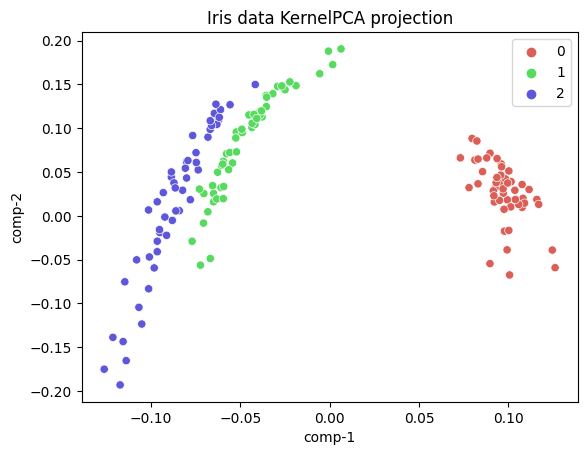

In [8]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_kpca[:,0]
df["comp-2"] = X_kpca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data KernelPCA projection")